# Data Analysis of Space Launches  

This project explores a dataset that contains information on space missions from 1957 to 2023. This dataset was used to analyze trends in space exploration, compare the activities of different companies, and understand the evolution of rocket technology. The purpose of this project is to learn more about space missions and how it has changed over the years.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/keremkarayaz/space-missions). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Which space organisation is most successful in terms of space launches?
2. How have space missions changed over the years?
3. When are space launches most likely to occur throughout the year?
4. What country has the highest success rate of space missions?
5. Is there a correlation between mission status and rocket status? 

## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

missions = pd.read_csv('space_missions.csv', encoding='latin-1')

## Load and Inspect Data

In [3]:
missions.info()
missions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",4/10/1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",3/11/1957,2:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",6/12/1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1/02/1958,3:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",5/02/1958,7:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


This dataset contains 4630 rows and 9 columns containing information about various space missions. All columns except 'Time', and 'Mission Status' do not have null values. 

Here's a breakdown of the columns in the dataset:
- **Company**: The organization responsible for the launch.
- **Location**: The geographical location of the launch site.
- **Date**: The date of the launch.
- **Time**: The time at which the launch occurred.
- **Rocket**: The model or name of the rocket used.
- **Mission**: The name or designation of the mission.
- **RocketStatus**: Indicates whether the rocket is still in use or has been retired.
- **Price**: The cost of the launch, if available.
- **MissionStatus**: Indicates the outcome of the mission, such as "Success" or "Failure".

In [4]:
missions.describe(include = 'all')

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",26/04/1962,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


There are 62 unique companies that have launched rockets into space and from 158 locations. Majority of rockets have retired and there were more successful missions than failed missions.

## Data Cleaning and Preparation

We will create an 'Hour' column from the string in the 'Time' column.

In [5]:
# Splitting time string and creating a 'Hour' column
time = missions.Time.str.split(':')
missions['Hour'] = time.str.get(0)

# Converting 'Hour' column data type from str to float
missions['Hour'] = missions['Hour'].astype('float')

Next, we will create 3 more columns specifically for the day, month and year of the launch.

In [6]:
# Splitting date string and creating 'Day', 'Month' and 'Year' column
date = missions.Date.str.split('/')
missions['Day'] = date.str.get(0)
missions['Month'] = date.str.get(1)
missions['Year'] = date.str.get(2)

A final column for the country at which the launch occured

In [7]:
# Splitting location string and create a 'Country' column
location = missions.Location.str.split(',')
missions['Country'] = location.str.get(-1)
missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Hour,Day,Month,Year,Country
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",4/10/1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,19.0,4,10,1957,Kazakhstan
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",3/11/1957,2:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,2.0,3,11,1957,Kazakhstan
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",6/12/1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,16.0,6,12,1957,USA
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1/02/1958,3:48:00,Juno I,Explorer 1,Retired,NaN,Success,3.0,1,02,1958,USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",5/02/1958,7:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,7.0,5,02,1958,USA


## Data Question 1: Which space organisation is most successful in terms of space launches?

In [26]:
# Initial space company count
companies = missions.Company.value_counts()

# Creating 
mask = missions.isin(companies[companies < 50].index)
missions[mask] = 'Others'
missions.Company.value_counts()
companies = missions.Company.value_counts().reset_index(name = 'Count')

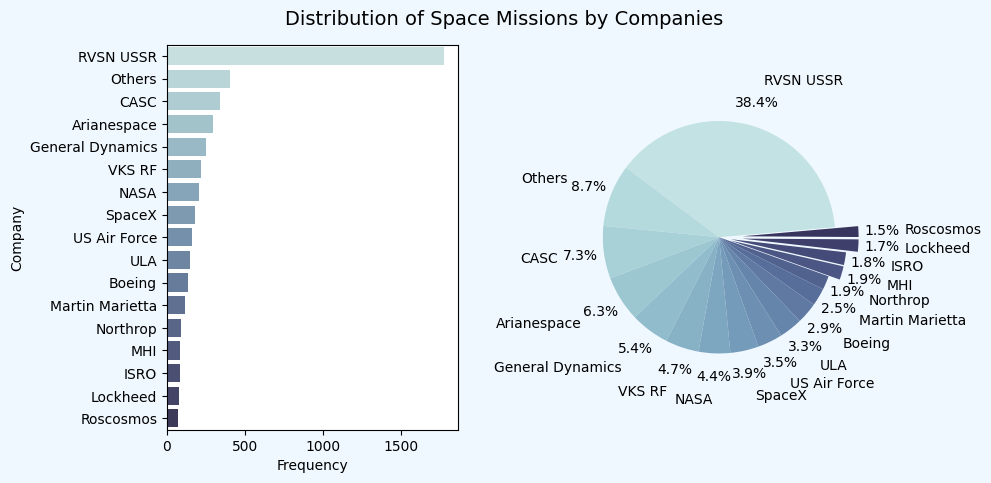

In [31]:
# Creating figure for space missions by company
fig = plt.figure(figsize = (9,5), facecolor = 'aliceblue')
plt.suptitle('Distribution of Space Missions by Companies', y = 0.95, fontsize = 14)
plt.subplots_adjust(wspace = 0.4)

# Plotting pie chart 
plt.subplot(1,2,2)
plt.pie(x = companies.Count, labels = companies.Company, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4,
       colors = sns.color_palette("ch:start=.2,rot=-.3", 19), startangle = 5
        , explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.2])

# Plotting bar chart 
plt.subplot(1,2,1)
sns.barplot(data = companies, y = 'Company', x = 'Count', palette = sns.color_palette("ch:start=.2,rot=-.3", 19))
plt.xlabel('Frequency')
plt.show()

The USSR (Union of Soviet Socialist Republics) has had the most space launches by an extremely large margin with over 1500 missions. The CASC (China Aerospace Science and Technology Corporation) has the second highest number of space launches with approximately 400 launches.

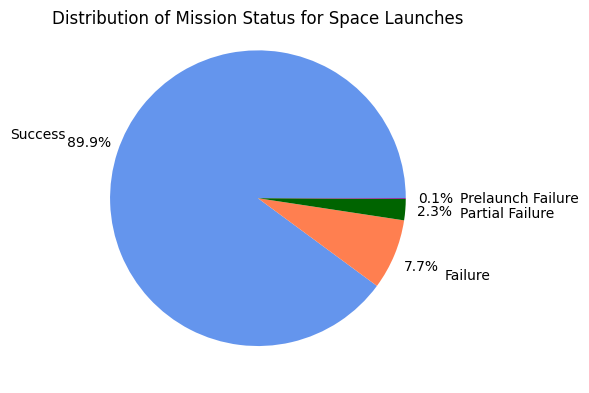

In [11]:
# Initial mission status count 
all_status= missions.MissionStatus.value_counts().reset_index(name = 'Count')

# Plotting pie chart 
plt.pie(x = all_status.Count, labels = all_status.MissionStatus, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.37,
       colors = ['cornflowerblue','coral', 'darkgreen', 'purple'])
plt.title('Distribution of Mission Status for Space Launches', y = 0.95)
plt.show()

Approximately 90% of space launches have been successful from 1957 to 2023 whilst 7.7% of space missions have been considered a failure. A small percentage of missions have been partial failures (2.3%) and pre-launch failures (0.1%).

In [12]:
# Determining success rate of each company by space launches
mission_status = missions.groupby('Company').MissionStatus.value_counts(normalize = True).mul(100).reset_index(name = 'Percentage')
mission_status = mission_status.drop([29,30,31,32]).reset_index().sort_values(by = 'Percentage')
mission_status_success = mission_status[mission_status.MissionStatus == 'Success']

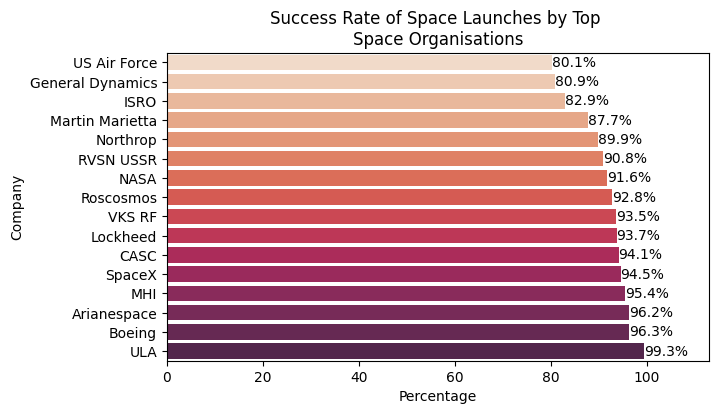

In [28]:
# Creating figure for top space companies by success rate
fig = plt.figure(figsize = (7,4))

# Plotting bar chart 
ax = sns.barplot(data = mission_status_success, y = 'Company', x = 'Percentage', 
            palette= sns.color_palette("rocket_r", 20))
ax.bar_label(ax.containers[0], fmt = '%1.1f%%')
plt.title('Success Rate of Space Launches by Top \nSpace Organisations')
plt.xlim(0, 113)
plt.show()

We determined the success rate of space companies who have performed more than 50 space missions and found that the United Launch Alliance (ULA) has the highest success rate of 99.3%, followed by Boeing and Arianespace. The USSR has a relatively high success rate of 90.8% considering that they have a significant number of space launches. 

## Data Question 2: How have space missions changed over the years?

In [14]:
# Determing success rate of space launches by year
years = missions.Year.value_counts().reset_index(name = 'Frequency').sort_values(by = 'Year')
year_status = missions.groupby('Year').MissionStatus.value_counts(normalize = True).mul(100).reset_index(name = 'Percentage')
year_success = year_status[year_status.MissionStatus == 'Success']

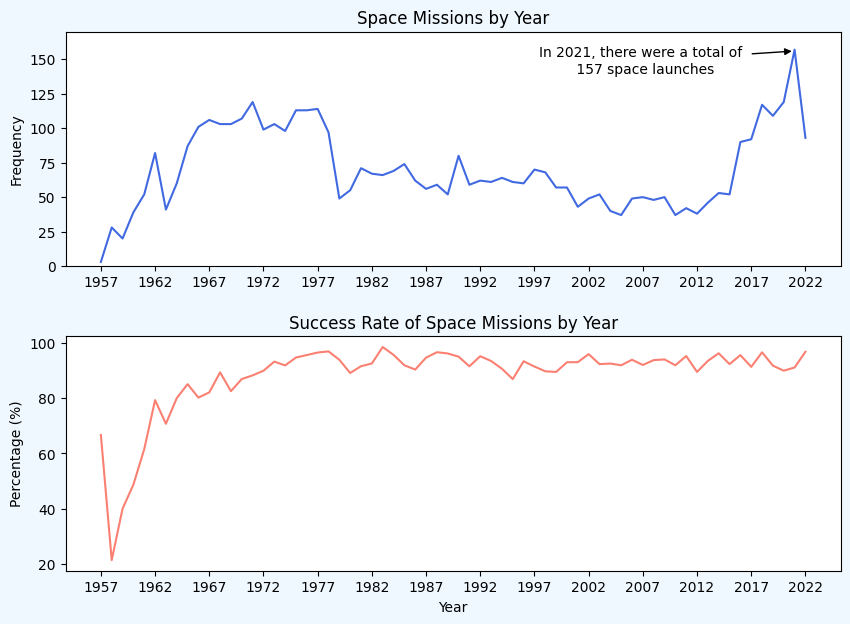

In [29]:
# Creating figure 
fig = plt.figure(figsize = (10,7), facecolor = 'aliceblue')
plt.subplots_adjust(hspace = 0.3)

# Plotting line graph for number of space launches over the years
plt.subplot(2,1,1)
plt.plot(years.Year, years.Frequency, color = 'royalblue')
plt.title('Space Missions by Year')
plt.annotate('In 2021, there were a total of \n 157 space launches', ha = 'center', fontsize = 10, 
             xy = (64, 156), xytext = (50, 140), color ='black', arrowprops  = dict(arrowstyle = '-|>', color = 'black'))
plt.xticks(ticks = np.arange(0, 70, step = 5))
plt.ylim(0, 170)
plt.ylabel('Frequency')

# Plotting line graph for success rate of space missions over the years
plt.subplot(2,1,2)
sns.lineplot(data = year_success, x = 'Year', y = 'Percentage', color = 'salmon')
plt.title('Success Rate of Space Missions by Year')
plt.xticks(ticks = np.arange(0, 70, step = 5))
plt.ylabel('Percentage (%)')
plt.show()

During the 1950s, the number of space missions have been increasing to a maximum of around 80 launches. In 1963, there was a decrease in space launches with only 40 but space missions continued to increase until the 1970s. After 1977, there was a significant drop in space launches, reaching around 40 to 70 launches each year until the 2010s. However, space missions began to rise again from 2012 to 2021, reaching its peak at around 150 launches in 2021. The success rate of space launches were low in the 1950s but increased gradually to approximately 90% in the 1970s and plateaued until the 2023. 

## Data Question 3: When are space launches most likely to occur throughout the year?

In [16]:
# Determining average number of space launches by month and hour
months = missions.Month.value_counts().reset_index(name = 'Total').sort_values(by = 'Month')
months['Average'] = months.Total.apply(lambda x: round(x/(2023-1957),1))
hour = missions.Hour.value_counts().reset_index(name = 'Count').sort_values(by = 'Hour')
hour['Average'] = hour.Count.apply(lambda x: round(x/(2023-1957),1))

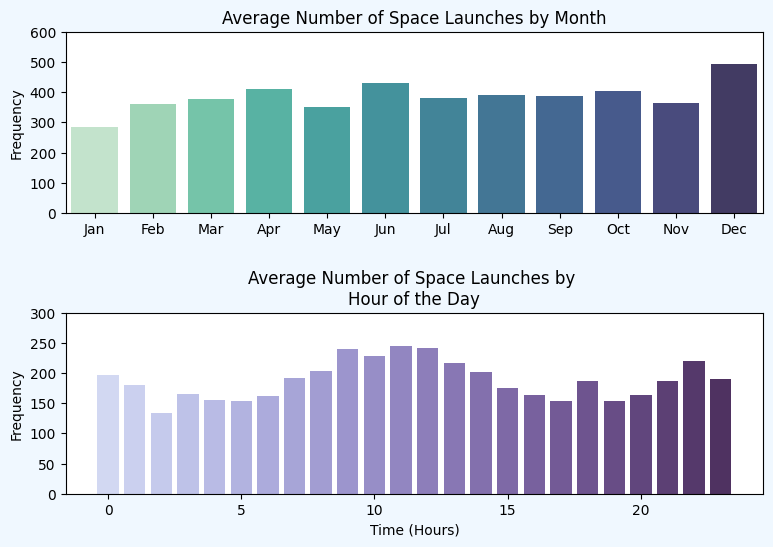

In [17]:
# Creating figure 
fig = plt.figure(figsize = (9,6), facecolor = 'aliceblue')
plt.subplots_adjust(hspace = 0.55)

# Plotting bar chart for avg. no. of space launches by month
plt.subplot(2,1,1)
sns.barplot(data = months, x = 'Month', y = 'Total', palette = sns.color_palette("mako_r", 15))
plt.title('Average Number of Space Launches by Month')
plt.xticks(ticks = np.arange(0,12), labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('')
plt.ylabel('Frequency')
plt.ylim(0, 600)

# Plotting bar chart for avg. no. of space launches by hour
plt.subplot(2,1,2)
plt.bar(x = hour.Hour, height = hour.Count, color = sns.cubehelix_palette(28,start=.4, rot=-.2))
plt.title('Average Number of Space Launches by \nHour of the Day')
plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.ylim(0, 300)
plt.show()

It seems that space launches are most common in June and December.The number of space launches fluctuate throughout the day but tt is also more common during the middle of the day, around 9pm to 1pm and in the middle of the night, around 10pm to 2am. 

## Data Question 4: What country has the highest success rate of space missions?

In [18]:
# Initial country count
country = missions.Country.value_counts()

# Grouping countries with less than 30 counts into 'Others'
mask = missions.isin(country[country < 30].index)
missions[mask] = 'Others'
country = missions.Country.value_counts().reset_index(name = 'Count')

# Determining success rate of space launches by countries
country_status = missions.groupby('Country').MissionStatus.value_counts(normalize = True).mul(100).sort_values(ascending = False).reset_index(name = 'Percentage')
country_success = country_status[country_status.MissionStatus == 'Success']

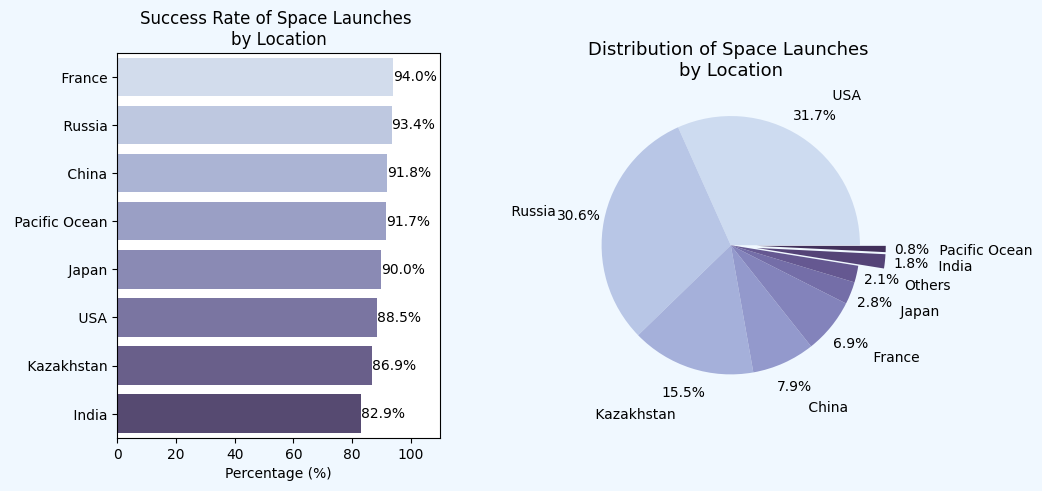

In [19]:
# Creating figure
fig = plt.figure(figsize = (10,5), facecolor = 'aliceblue')
plt.subplots_adjust(wspace = 0.4)

# Plotting pie chart for space launches by location
plt.subplot(1,2,2)
plt.pie(x = country.Count, labels = country.Country, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.38,
       colors = sns.cubehelix_palette(10, start=.3, rot=-.2), explode = [0,0,0,0,0,0,0,0.2,0.2])
plt.title('Distribution of Space Launches \nby Location', fontsize = 13)

# Plotting bar chart for success rate of space launches by location
plt.subplot(1,2,1)
ax = sns.barplot(data = country_success[0:8], y = 'Country', x = 'Percentage', palette = sns.cubehelix_palette(10, start=.3, rot=-.2))
ax.bar_label(ax.containers[0], fmt = '%1.1f%%')
plt.title('Success Rate of Space Launches \nby Location')
plt.xlabel('Percentage (%)')
plt.ylabel('')
plt.xlim(0, 110)
plt.show()

The United States and Russia have the most number of space launches, accounting for 31.7% and 30.6% of all space launches respectively. However, France has the highest success rate with 94% followed by Russia and China with 93.4% and 91.8% respectively. 

In [20]:
# Initial rocket count
rockets = missions.Rocket.value_counts().sort_values(ascending = False).reset_index(name = 'Frequency')

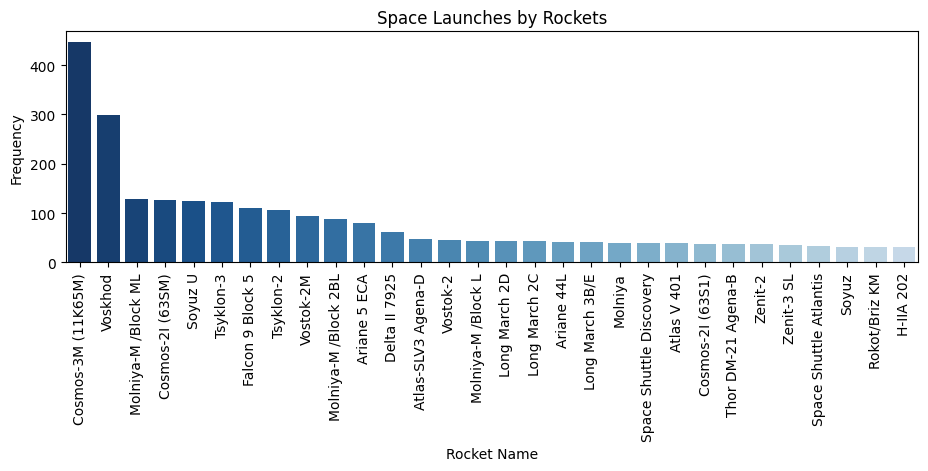

In [21]:
# Plotting bar chart for rockets with the most space missions
fig = plt.figure(figsize = (11,3))
sns.barplot(data = rockets[0:30], x = 'Rocket', y = 'Frequency', palette = sns.color_palette("Blues_r", 40))
plt.title('Space Launches by Rockets')
plt.xlabel('Rocket Name')
plt.xticks(rotation = 90)
plt.show()

The Cosmos-3M, Voskhod and Molniya-M spacecraft have the highest number of space launches with approximately 430, 300 and 120 launches respectively. These spacecrafts were all built by the Soviet Union.

## Data Question 5: Is there a correlation between mission status and rocket status?

This section will run some chi-squared tests to see if the success of missions have statistically significant differences in the rocket status. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:


||Active|Retired|
|-|-|-|
|Success|?|?|
|Failure|?|?|


In [22]:
# Determining count for active and retired rockets with successful and failed missions
suc_act = len(missions[(missions.RocketStatus == 'Active') & (missions.MissionStatus == 'Success')])
suc_ret = len(missions[(missions.RocketStatus == 'Active') & (missions.MissionStatus == 'Failure')])
fai_act = len(missions[(missions.RocketStatus == 'Retired') & (missions.MissionStatus == 'Success')])
fai_ret = len(missions[(missions.RocketStatus == 'Retired') & (missions.MissionStatus == 'Failure')])

||Active|Retired|
|-|-|-|
|Success|941|51|
|Failure|3221|306|

In [23]:
# Performing chi2 contingency test
contingency = [[suc_act, suc_ret],[fai_act,fai_ret]]
chi2, pval, dof, expected = chi2_contingency(contingency)
print('Chi-square Statistic:', chi2)
print('P-value:', pval)

Chi-square Statistic: 12.814544773883474
P-value: 0.0003439350824938979


The standard p-value to test statistical signifance is 0.05. Since the p-value is lower than this threshold, this signifies that the p-value is significant and we can reject the null hypothesis. Thus, this suggests that a rocket that with a successful mission is more likely to remain active than a failed mission. 

## Conclusion

For this project, the objective was to identify any trends in space missions and understand the evolution of space technology. From our analysis, we found that space launches were performed in Russia and the United States the most. The USSR has the record for the most space missions as the only space organisation to have more than 1500 missions. During the beginning of space exploration, the success rate was relatively low, around 60% to 80% but nowadays, space launches tend to be successful with a  success rate of approximately 90%. Space launches performed in France have the highest success rate of 94%. Space launches are more common in December and during the middle or end of the day. Lastly, we found that there is a significant relationship between missions success and rocket status which means that space missions that are successful are more likely to remain active. 